<a href="https://colab.research.google.com/github/bernebas/Bernebas/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 6

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

n =   5 | mean ≈      11.29 | 95% CI: [     11.15,      11.43]
n =  10 | mean ≈      29.05 | 95% CI: [     28.74,      29.36]
n =  20 | mean ≈      71.78 | 95% CI: [     71.12,      72.44]
n =  50 | mean ≈     224.80 | 95% CI: [    223.05,     226.56]
n = 100 | mean ≈     517.65 | 95% CI: [    514.19,     521.10]
n = 200 | mean ≈    1177.60 | 95% CI: [   1170.49,    1184.71]
n = 500 | mean ≈    3407.47 | 95% CI: [   3389.48,    3425.46]


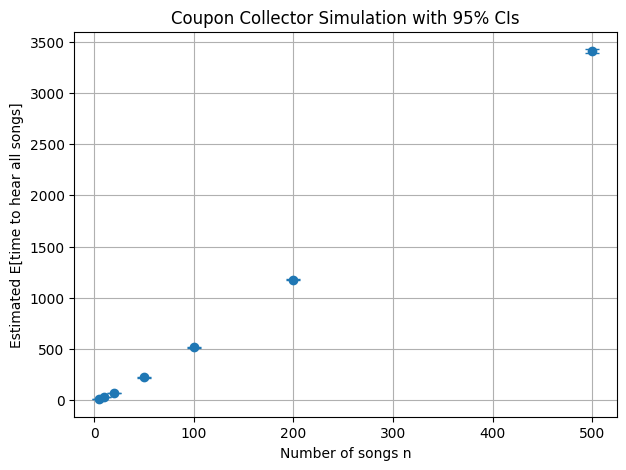

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Helper: simulate time to hear all n songs once ----------

def time_to_hear_all(n, rng):
    """
    Simulate the number of plays until all n songs have been heard at least once.
    Spotify picks each song uniformly at random each play.
    """
    heard = np.zeros(n, dtype=bool)
    num_heard = 0
    t = 0
    while num_heard < n:
        song = rng.integers(0, n)   # random song in {0,...,n-1}
        t += 1
        if not heard[song]:
            heard[song] = True
            num_heard += 1
    return t

# ---------- Main simulation ----------

rng = np.random.default_rng(seed=0)  # fixed seed for reproducibility

# Choose a range of n values
n_values = [5, 10, 20, 50, 100, 200, 500]
num_trials = 5000   # you can increase this for tighter CIs, at the cost of time

est_means = []
ci_lows = []
ci_highs = []

for n in n_values:
    samples = np.array([time_to_hear_all(n, rng) for _ in range(num_trials)], dtype=float)
    mean = samples.mean()
    std = samples.std(ddof=1)

    # 95% CI using normal approximation
    half_width = 1.96 * std / np.sqrt(num_trials)
    low = mean - half_width
    high = mean + half_width

    est_means.append(mean)
    ci_lows.append(low)
    ci_highs.append(high)

    print(f"n = {n:3d} | mean ≈ {mean:10.2f} | 95% CI: [{low:10.2f}, {high:10.2f}]")

# ---------- Plot the estimates with 95% confidence intervals ----------

n_values = np.array(n_values, dtype=float)
est_means = np.array(est_means)
ci_lows = np.array(ci_lows)
ci_highs = np.array(ci_highs)

plt.figure(figsize=(7,5))
plt.errorbar(n_values, est_means,
             yerr=[est_means - ci_lows, ci_highs - est_means],
             fmt='o', capsize=5)
plt.xlabel("Number of songs n")
plt.ylabel("Estimated E[time to hear all songs]")
plt.title("Coupon Collector Simulation with 95% CIs")
plt.grid(True)
plt.show()



<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

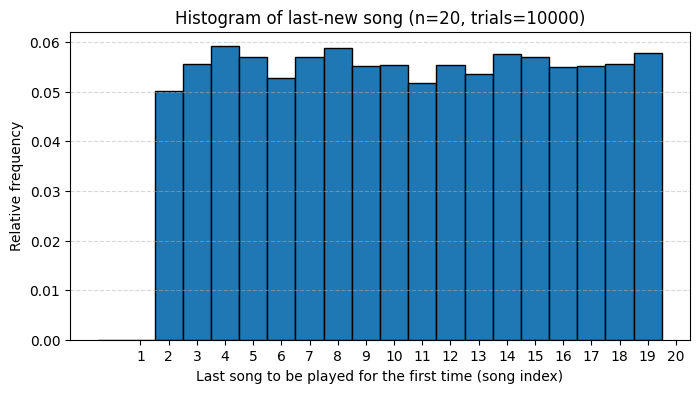

Song  2: 0.0474
Song  3: 0.0526
Song  4: 0.0559
Song  5: 0.0538
Song  6: 0.0499
Song  7: 0.0539
Song  8: 0.0555
Song  9: 0.0522
Song 10: 0.0523
Song 11: 0.0490
Song 12: 0.0523
Song 13: 0.0507
Song 14: 0.0544
Song 15: 0.0539
Song 16: 0.0520
Song 17: 0.0522
Song 18: 0.0525
Song 19: 0.0547
Song 20: 0.0548


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Parameters
# ----------------------------------------------------
n_songs = 20          # n in the problem
n_trials = 10000      # number of simulations (increase if you want smoother histogram)

rng = np.random.default_rng(seed=0)  # RNG for reproducibility

last_songs = []  # store the index of the last-new song in each trial

for _ in range(n_trials):
    # Songs are 0,...,n-1 internally; we'll add +1 when plotting
    current = 0          # "song 1" in the problem
    visited = np.zeros(n_songs, dtype=bool)
    visited[current] = True
    n_visited = 1

    while n_visited < n_songs:
        # Choose next or previous with prob 1/2 each, on a ring
        step = rng.choice([-1, 1])
        current = (current + step) % n_songs

        if not visited[current]:
            visited[current] = True
            n_visited += 1
            last_new = current  # current is the latest *new* song

    last_songs.append(last_new)

last_songs = np.array(last_songs)

# ----------------------------------------------------
# Make histogram of the last song index (1..n)
# ----------------------------------------------------
plt.figure(figsize=(8,4))
bins = np.arange(-0.5, n_songs + 0.5, 1)  # so each song is its own bin
plt.hist(last_songs + 1, bins=bins, edgecolor='black', density=True)
plt.xlabel("Last song to be played for the first time (song index)")
plt.ylabel("Relative frequency")
plt.title(f"Histogram of last-new song (n={n_songs}, trials={n_trials})")
plt.xticks(np.arange(1, n_songs + 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Optional: print approximate probabilities
values, counts = np.unique(last_songs + 1, return_counts=True)
probs = counts / n_trials
for v, p in zip(values, probs):
    print(f"Song {v:2d}: {p:.4f}")


<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

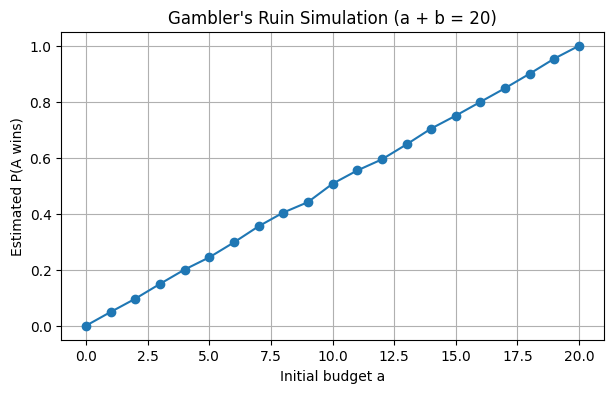

,a,P(A wins)
0,0,0.000000
1,1,0.049000
2,2,0.096375
3,3,0.149250
4,4,0.200500
5,5,0.244125
6,6,0.297500
7,7,0.355000
8,8,0.404000
9,9,0.441375


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def gambler_ruin_prob(a, total=20, trials=5000, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    wins = 0
    for _ in range(trials):
        A = a
        B = total - a
        while A > 0 and B > 0:
            if rng.integers(0,2) == 0:  # A wins a dollar
                A += 1
                B -= 1
            else:
                A -= 1
                B += 1
        if A > 0:
            wins += 1
    return wins / trials

total = 20
rng = np.random.default_rng(4)
a_values = list(range(total+1))
probs = [gambler_ruin_prob(a, total=total, trials=8000, rng=rng) for a in a_values]

plt.figure(figsize=(7,4))
plt.plot(a_values, probs, marker='o')
plt.xlabel("Initial budget a")
plt.ylabel("Estimated P(A wins)")
plt.title("Gambler's Ruin Simulation (a + b = 20)")
plt.grid(True)
plt.show()

pd.DataFrame({"a": a_values, "P(A wins)": probs})


**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

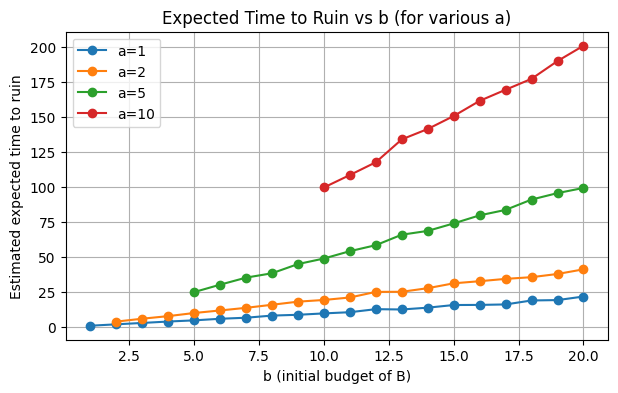

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---- One game simulation ----
def time_to_ruin(a, b, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    A, B = a, b
    t = 0
    while A > 0 and B > 0:
        t += 1
        if rng.integers(0,2) == 0:   # A wins
            A += 1
            B -= 1
        else:                        # A loses
            A -= 1
            B += 1
    return t

# ---- Average time over multiple trials ----
def mean_time_to_ruin(a, b, trials=3000, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    times = [time_to_ruin(a, b, rng) for _ in range(trials)]
    return np.mean(times)

rng = np.random.default_rng(0)

# ---- Choose a few a-values and vary b ----
a_values = [1, 2, 5, 10]
b_max = 20

records = []
for a in a_values:
    for b in range(a, b_max+1):   # ensure a <= b
        mtime = mean_time_to_ruin(a, b, trials=3000, rng=rng)
        records.append({"a": a, "b": b, "mean_time": mtime})

df = pd.DataFrame(records)

# ---- Plot ----
plt.figure(figsize=(7,4))
for a in a_values:
    sub = df[df["a"] == a]
    plt.plot(sub["b"], sub["mean_time"], marker="o", label=f"a={a}")

plt.xlabel("b (initial budget of B)")
plt.ylabel("Estimated expected time to ruin")
plt.title("Expected Time to Ruin vs b (for various a)")
plt.grid(True)
plt.legend()
plt.show()


<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?



To ensure the hospital can keep up with demand, we require

$$
\lambda < c\mu,
$$

where  
- \( \lambda \) = arrival rate,  
- \( c \) = number of servers (doctors, receptionists, beds),  
- \( \mu \) = service rate per server.



### **1. Reception**

External arrival rate:

$$
\lambda_R = 20 \text{ patients/hr}
$$

Service time is 5 minutes:

$$
E[S_R] = \frac{5}{60} = \frac{1}{12} \text{ hr}
$$

Service rate per receptionist:

$$
\mu_R = 12 \text{ patients/hr}
$$

Capacity requirement:

$$
n_R \cdot 12 \ge 20
$$

$$
n_R \ge \frac{20}{12} \approx 1.67
$$

**Minimum:**

$$
\boxed{n_R = 2}
$$



### **2. Clinic**

Arrival rate from reception:

$$
\lambda_C = 20 \text{ hr}
$$

Service time 15 minutes:

$$
E[S_C] = 0.25 \text{ hr}
$$

Service rate per clinic doctor:

$$
\mu_C = 4 \text{ hr}
$$

Capacity requirement:

$$
d_C \cdot 4 > 20
$$

$$
d_C ≥ 5
$$

**Minimum:**

$$
\boxed{d_C \ge 6}
$$



### **3. ER**

Emergency arrivals:

$$
\lambda_E = 5 \text{ hr}^{-1}
$$

Service time:

$$
E[S_E] = 1 \text{ hr}
$$

Service rate per ER doctor:

$$
\mu_E = 1
$$

Capacity requirement:

$$
d_E \cdot 1 > 5
$$

$$
d_E > 5
$$

**Minimum:**

$$
\boxed{d_E ≥ 5}
$$



### **4. Internal Ward (IW)**

Patients sent to IW:

- 10% of Clinic  
- 50% of ER

$$
\lambda_I = 0.1(20) + 0.5(5)
$$

$$
\lambda_I = 2 + 2.5 = 4.5 \text{ hr}^{-1}
$$

Stay in IW:

$$
E[S_I] = 72 \text{ hr}
$$

Service rate per bed:

$$
\mu_I = \frac{1}{72}
$$

Capacity requirement:

$$
N_I \cdot \frac{1}{72} \ge 4.5
$$

$$
N_I \ge 4.5 \cdot 72
$$

$$
N_I \ge 324
$$

**Minimum:**

$$
\boxed{N_I = 324}
$$

---

## **Final Bounds**

$$
\boxed{
n_R \ge 2,\quad
d_C \ge 5,\quad
d_E \ge 5,\quad
N_I \ge 324
}
$$


<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

###

For the clinic we model an \(M/M/s\) system with:

- Arrival rate  
  $$\lambda = 20 \;\text{patients/hour}$$

- Service time per doctor: 15 minutes \(=0.25\) hours  
  $$\mu = 4 \;\text{patients/hour per doctor}$$

- Number of clinic doctors  
  $$s = d_C = 10$$

---

#### Traffic intensity

The utilization per doctor is

$$
\rho = \frac{\lambda}{s\mu}
    = \frac{20}{10 \cdot 4}
    = 0.5.
$$

It is convenient to define

$$
a = s\rho = 10 \cdot 0.5 = 5.
$$

---

#### Erlang C waiting probability

For an \(M/M/s\) queue, the probability that an arrival has to wait is

$$
P(W>0)
= \frac{\dfrac{a^s}{s!(1-\rho)}}
       {\displaystyle \sum_{k=0}^{s-1} \frac{a^k}{k!}
        \;+\; \frac{a^s}{s!(1-\rho)}}.
$$

First compute the partial sum

$$
D_1 = \sum_{k=0}^{s-1} \frac{a^k}{k!}
   \approx 143.69,
$$

and the last term

$$
D_2 = \frac{a^s}{s!(1-\rho)}
   = \frac{5^{10}}{10!(1-0.5)}
   \approx 5.38.
$$

Hence

$$
P(W>0)
= \frac{D_2}{D_1 + D_2}
\approx \frac{5.38}{143.69 + 5.38}
\approx 0.036.
$$

So only about \(3.6\%\) of arrivals have to wait.

---

#### Expected waiting time in queue

For an \(M/M/s\) system,

$$
W_q = \frac{P(W>0)}{s\mu - \lambda}.
$$

Here

$$
W_q
= \frac{0.036}{40 - 20}
\approx 0.0018 \;\text{hours}
\approx 0.11 \;\text{minutes}.
$$

---

#### Total time spent in the clinic

The total time in system is waiting plus service:

$$
W = W_q + \frac{1}{\mu}
   \approx 0.0018 + 0.25
   \approx 0.252 \;\text{hours}.
$$

In minutes,

$$
W \approx 0.252 \times 60 \approx 15.1 \;\text{minutes}.
$$

---

#### Average number of busy clinic doctors

The mean number of patients in service (i.e., busy doctors) is

$$
L_s = \frac{\lambda}{\mu}
    = \frac{20}{4}
    = 5.
$$

---

### Final results

- **Average time spent in the clinic (excluding reception):**
  $$\boxed{W \approx 15.1\ \text{minutes}}$$

- **Average number of busy clinic doctors:**
  $$\boxed{L_s \approx 5}$$


<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

###

**clinic arrival rate** is
$$
\lambda_C = 20 \;\text{patients/hour},
$$
and the **ER arrival rate** is
$$
\lambda_E = 5 \;\text{patients/hour}.
$$


$$
\mathbb{P}(\text{clinic empty and ER empty})
= P_{0,C}\,P_{0,E},
$$

where \(P_{0,C}\) and \(P_{0,E}\) are the probabilities that the clinic and ER
are empty, respectively.

---

### Clinic: probability of zero patients

Parameters for the clinic:

- number of doctors:  
  $$s_C = d_C = 10,$$
- service rate per doctor (15 minutes per patient):  
  $$\mu_C = 4 \;\text{patients/hour},$$
- arrival rate:  
  $$\lambda_C = 20.$$

Traffic intensity:
$$
\rho_C = \frac{\lambda_C}{s_C \mu_C}
       = \frac{20}{10\cdot 4}
       = 0.5.
$$

Define
$$
a_C = s_C \rho_C = 10 \cdot 0.5 = 5.
$$

For an \(M/M/s\) system, the probability of zero patients is
$$
P_{0,C}
=
\left[
\sum_{k=0}^{s_C-1}\frac{a_C^k}{k!}
+
\frac{a_C^{s_C}}{s_C!(1-\rho_C)}
\right]^{-1}.
$$

Compute the two pieces of the denominator:
$$
D_{1,C} = \sum_{k=0}^{9}\frac{5^k}{k!} \approx 143.69,
$$
$$
D_{2,C} = \frac{5^{10}}{10!(1-0.5)} \approx 5.38.
$$

Thus
$$
P_{0,C}
= \frac{1}{D_{1,C} + D_{2,C}}
\approx \frac{1}{143.69 + 5.38}
\approx 0.0067.
$$

---

### ER: probability of zero patients

Parameters for the ER:

- number of ER doctors:  
  $$s_E = d_E = 7,$$
- service rate per doctor (1 hour per patient):  
  $$\mu_E = 1 \;\text{patient/hour},$$
- arrival rate:  
  $$\lambda_E = 5.$$

Traffic intensity:
$$
\rho_E = \frac{\lambda_E}{s_E \mu_E}
       = \frac{5}{7}
       \approx 0.714.
$$

Again set
$$
a_E = s_E \rho_E = 7 \cdot \frac{5}{7} = 5.
$$

Then
$$
P_{0,E}
=
\left[
\sum_{k=0}^{s_E-1}\frac{a_E^k}{k!}
+
\frac{a_E^{s_E}}{s_E!(1-\rho_E)}
\right]^{-1}.
$$

Numerically,
$$
D_{1,E} = \sum_{k=0}^{6}\frac{5^k}{k!} \approx 113.12,
$$
$$
D_{2,E} = \frac{5^{7}}{7!(1-\rho_E)} \approx 54.25.
$$

So
$$
P_{0,E}
= \frac{1}{D_{1,E} + D_{2,E}}
\approx \frac{1}{113.12 + 54.25}
\approx 0.0060.
$$

---

### Probability both ER and clinic are empty


$$
\mathbb{P}(\text{no patients in ER and no patients in clinic})
= P_{0,C} P_{0,E}
\approx (0.0067)(0.0060)
\approx 4.0\times 10^{-5}.
$$


$$
\boxed{\mathbb{P}(\text{ER and clinic empty}) \approx 0.004\% \;=\; 4.0\times 10^{-5}.}
$$


<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

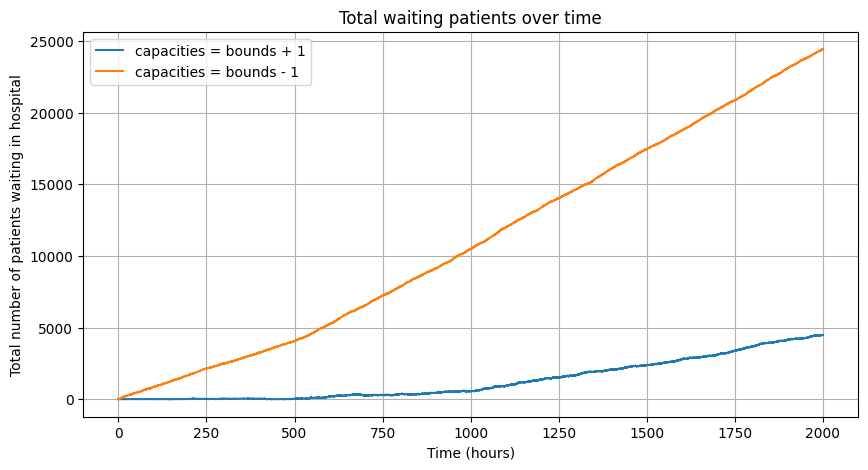

Estimated average time in clinic (simulation): 15.23 minutes
Estimated average number of busy clinic doctors: 5.74


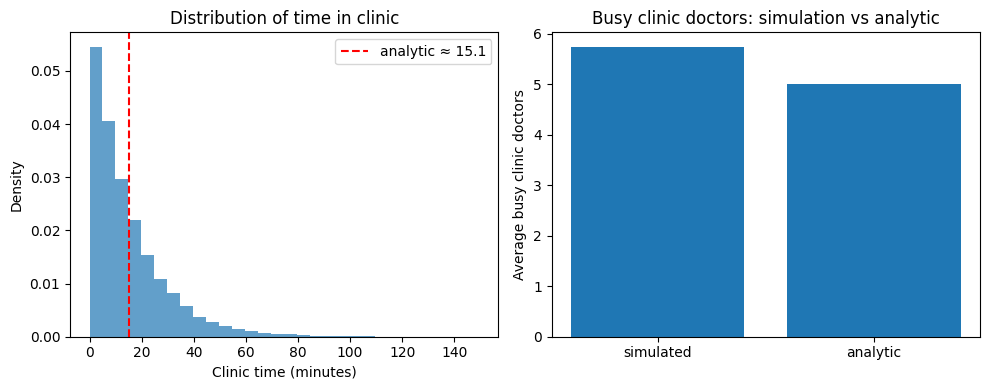

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq, random

def simulate(Tmax, n_R, d_C, d_E, n_I, seed=0):
    random.seed(seed)

    # External arrival rates
    lam_R_ext = 20.0    # reception
    lam_E_ext = 5.0     # ER

    # Service rates
    mu_R = 12.0         # 5 minutes
    mu_C = 4.0          # 15 minutes
    mu_E = 1.0          # 1 hour
    mu_I = 1/72.0       # 72 hours

    # Routing probabilities
    p_clinic_follow = 0.25     # clinic -> follow-up reception after 504h
    p_clinic_IW     = 0.10     # clinic -> IW
    p_ER_IW         = 0.50     # ER -> IW
    p_IW_discharge  = 0.20     # IW -> discharge (otherwise follow-up to reception)

    # State: busy servers and queue lengths (except clinic queue, where we keep arrival times)
    busy_R, q_R = 0, 0
    busy_E, q_E = 0, 0
    busy_I, q_I = 0, 0

    busy_C = 0
    queue_C = []  # list of clinic arrival times

    cap_R = n_R
    cap_C = d_C
    cap_E = d_E
    cap_I = n_I

    # Event list: (time, seq, type, extra)
    events = []
    seq = 0

    def schedule(t, typ, extra=None):
        nonlocal seq
        heapq.heappush(events, (t, seq, typ, extra))
        seq += 1

    # Initial external arrivals
    schedule(random.expovariate(lam_R_ext), 'arr_R_ext')
    schedule(random.expovariate(lam_E_ext), 'arr_E_ext')

    # Statistics
    t_prev = 0.0
    time_points = []
    waiting_counts = []

    area_busy_C = 0.0
    clinic_sojourns = []

    while events:
        t, _, typ, extra = heapq.heappop(events)
        if t > Tmax:
            break

        # Update time-average busy clinic doctors
        area_busy_C += busy_C * (t - t_prev)
        t_prev = t

        # Total number of *waiting* patients
        total_waiting = q_R + q_E + q_I + len(queue_C)
        time_points.append(t)
        waiting_counts.append(total_waiting)

        # Handle event
        if typ == 'arr_R_ext' or typ == 'arr_R_follow':
            # Schedule next external arrival for reception
            if typ == 'arr_R_ext':
                schedule(t + random.expovariate(lam_R_ext), 'arr_R_ext')
            # Arrival to reception
            if busy_R < cap_R:
                busy_R += 1
                service_time = random.expovariate(mu_R)
                schedule(t + service_time, 'dep_R')
            else:
                q_R += 1

        elif typ == 'dep_R':
            # Departure from reception -> arrival to clinic
            # Start next reception service if queue non-empty
            if q_R > 0:
                q_R -= 1
                service_time = random.expovariate(mu_R)
                schedule(t + service_time, 'dep_R')
            else:
                busy_R -= 1

            # Arrival to clinic at time t
            if busy_C < cap_C:
                busy_C += 1
                st = random.expovariate(mu_C)
                schedule(t + st, 'dep_C', t)   # carry arrival time as "extra"
            else:
                queue_C.append(t)

        elif typ == 'arr_E_ext':
            # Schedule next external ER arrival
            schedule(t + random.expovariate(lam_E_ext), 'arr_E_ext')
            # Arrival to ER
            if busy_E < cap_E:
                busy_E += 1
                st = random.expovariate(mu_E)
                schedule(t + st, 'dep_E')
            else:
                q_E += 1

        elif typ == 'arr_I_from_C_or_E':
            # Arrival to internal ward
            if busy_I < cap_I:
                busy_I += 1
                st = random.expovariate(mu_I)
                schedule(t + st, 'dep_I')
            else:
                q_I += 1

        elif typ == 'dep_E':
            # Routing from ER
            if random.random() < p_ER_IW:
                schedule(t, 'arr_I_from_C_or_E')
            # Start next ER service if queue non-empty
            if q_E > 0:
                q_E -= 1
                st = random.expovariate(mu_E)
                schedule(t + st, 'dep_E')
            else:
                busy_E -= 1

        elif typ == 'dep_I':
            # Routing from IW
            if random.random() >= p_IW_discharge:
                schedule(t + 504.0, 'arr_R_follow')   # follow-up at reception
            # Start next IW service if queue non-empty
            if q_I > 0:
                q_I -= 1
                st = random.expovariate(mu_I)
                schedule(t + st, 'dep_I')
            else:
                busy_I -= 1

        elif typ == 'dep_C':
            # Departure from clinic; "extra" carries clinic arrival time
            arrival_time = extra
            clinic_sojourns.append(t - arrival_time)

            # Routing from clinic
            r = random.random()
            if r < p_clinic_follow:
                schedule(t + 504.0, 'arr_R_follow')
            elif r < p_clinic_follow + p_clinic_IW:
                schedule(t, 'arr_I_from_C_or_E')
            # else: discharged

            # Start next clinic service if someone is waiting
            if queue_C:
                next_arr = queue_C.pop(0)
                st = random.expovariate(mu_C)
                schedule(t + st, 'dep_C', next_arr)
            else:
                busy_C -= 1

        else:
            raise RuntimeError(f"Unknown event type {typ}")

    avg_busy_C = area_busy_C / Tmax
    return {
        "time": np.array(time_points),
        "waiting": np.array(waiting_counts),
        "avg_busy_C": avg_busy_C,
        "clinic_sojourns": np.array(clinic_sojourns),
    }

# -------------------------------------------------------------------
# (i) Total number of patients waiting: capacities +1 vs -1
# -------------------------------------------------------------------

Tmax = 2000  # simulation horizon (hours)

# Bounds from part (a):
# n_R >= 2, d_C >= 6, d_E >= 6, n_I >= 325
base = {"n_R": 2, "d_C": 6, "d_E": 6, "n_I": 325}
plus  = {k: v + 1 for k, v in base.items()}
minus = {k: v - 1 for k, v in base.items()}

res_plus  = simulate(Tmax, **plus,  seed=0)
res_minus = simulate(Tmax, **minus, seed=1)

plt.figure(figsize=(10,5))
plt.plot(res_plus["time"],  res_plus["waiting"],  label="capacities = bounds + 1")
plt.plot(res_minus["time"], res_minus["waiting"], label="capacities = bounds - 1")
plt.xlabel("Time (hours)")
plt.ylabel("Total number of patients waiting in hospital")
plt.title("Total waiting patients over time")
plt.legend()
plt.grid(True)
plt.show()

# From this plot we can visually assess whether the number of waiting patients
# stabilizes (leveling off) or appears to grow without bound in each case.

# -------------------------------------------------------------------
# (ii) Configuration from part (b):
# d_E = 7, d_C = 10, n_I = 500 (take n_R = 2)
# -------------------------------------------------------------------

config_b = {"n_R": 2, "d_C": 10, "d_E": 7, "n_I": 500}
res_b = simulate(Tmax, **config_b, seed=2)

clinic_times_minutes = res_b["clinic_sojourns"] * 60.0
avg_time_clinic = clinic_times_minutes.mean()
avg_busy_docs   = res_b["avg_busy_C"]

print(f"Estimated average time in clinic (simulation): {avg_time_clinic:.2f} minutes")
print(f"Estimated average number of busy clinic doctors: {avg_busy_docs:.2f}")

# For comparison, the analytic answers in part (b) were:
#  - Average time in clinic ≈ 15.1 minutes
#  - Average number of busy clinic doctors ≈ 5

# Simple plots for these simulated averages
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(clinic_times_minutes, bins=30, density=True, alpha=0.7)
plt.axvline(15.1, color="red", linestyle="--", label="analytic ≈ 15.1")
plt.xlabel("Clinic time (minutes)")
plt.ylabel("Density")
plt.title("Distribution of time in clinic")
plt.legend()

plt.subplot(1,2,2)
plt.bar(["simulated", "analytic"], [avg_busy_docs, 5.0])
plt.ylabel("Average busy clinic doctors")
plt.title("Busy clinic doctors: simulation vs analytic")

plt.tight_layout()
plt.show()
